In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Heart_Attack_Risk_Levels_Dataset.csv")

In [4]:
df.head(3)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor


In [5]:
df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
Risk_Level                   object
Recommendation               object
dtype: object

In [45]:
df.shape

(1319, 11)

In [6]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
Risk_Level                  0
Recommendation              0
dtype: int64

In [7]:
# Binary encoding for Result
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})

# Label encoding for Risk_Level (Target)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Risk_Level'] = le.fit_transform(df['Risk_Level'])


In [8]:
df.head(3)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,0,2,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,1,0,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,0,2,Monitor closely and consult doctor


##      Drop Unnecessary Columns

In [9]:
df.drop(columns=['Recommendation'], inplace=True)


In [10]:
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level
0,63,1,66,160,83,160.0,1.80,0.012,0,2
1,20,1,94,98,46,296.0,6.75,1.060,1,0
2,56,1,64,160,77,270.0,1.99,0.003,0,2
3,66,1,70,120,55,270.0,13.87,0.122,1,0
4,54,1,64,112,65,300.0,1.08,0.003,0,2


###          Basic Exploratory Data Analysis (EDA)

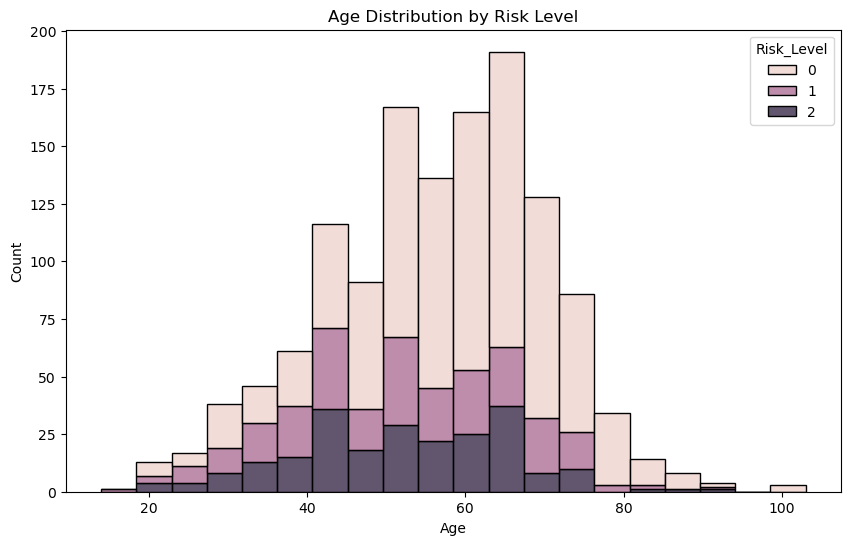

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', bins=20, hue='Risk_Level', multiple='stack')
plt.title('Age Distribution by Risk Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

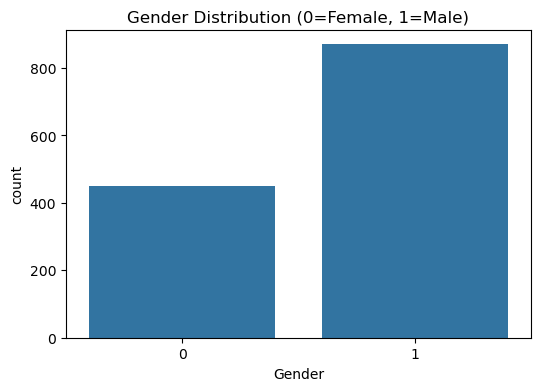

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution (0=Female, 1=Male)')
plt.show()

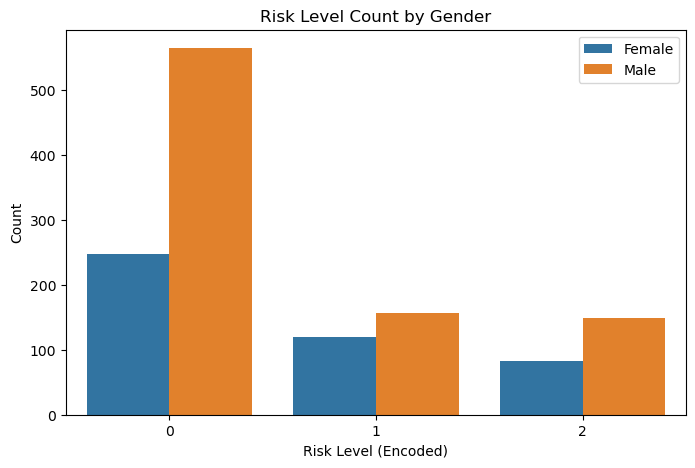

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Risk_Level', hue='Gender')
plt.title('Risk Level Count by Gender')
plt.xlabel('Risk Level (Encoded)')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()

In [16]:
avg_hr = df.groupby('Risk_Level')['Heart rate'].mean()
print("Average Heart Rate by Risk Level:")
print(avg_hr)


Average Heart Rate by Risk Level:
Risk_Level
0    78.591133
1    76.065455
2    80.137931
Name: Heart rate, dtype: float64


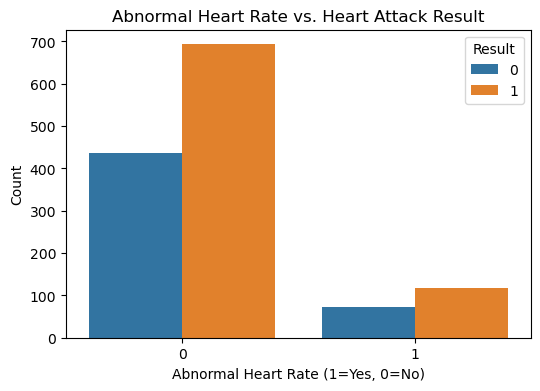

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Abnormal_HR', hue='Result')
plt.title('Abnormal Heart Rate vs. Heart Attack Result')
plt.xlabel('Abnormal Heart Rate (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [19]:
bp_means = df.groupby('Risk_Level')[['Systolic blood pressure', 'Diastolic blood pressure']].mean()
print("Mean Blood Pressure by Risk Level:")
print(bp_means)

Mean Blood Pressure by Risk Level:
            Systolic blood pressure  Diastolic blood pressure
Risk_Level                                                   
0                        126.645320                 72.130542
1                        113.629091                 67.669091
2                        145.060345                 78.206897


In [20]:
high_bp_patients = df[(df['Systolic blood pressure'] > 140) & (df['Diastolic blood pressure'] > 90)]
print("High BP Patients Risk Level Distribution:")
print(high_bp_patients['Risk_Level'].value_counts())

High BP Patients Risk Level Distribution:
Risk_Level
0    56
2    47
Name: count, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
features = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

# === Option 1: Predict Risk_Level (Multiclass) ===
target = 'Risk_Level'

# If you want binary classification on 'Result', set:
# target = 'Result'

X = df[features]
y = df[target]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Logistic Regression
lr = LogisticRegression(max_iter=500)



In [58]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [59]:
y_pred_lr = lr.predict(X_test)
lr.score(X_train, y_train)

0.7601895734597156

In [60]:
lr.score(X_test,y_test)

0.7992424242424242

In [61]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)



In [62]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [50]:
y_pred_rf = rf.predict(X_test)


In [51]:
rf.score(X_train,y_train)

1.0

In [52]:
lr.score(X_test,y_test)

0.7992424242424242

In [54]:
import numpy as np

# Assume the model is already trained (e.g., logistic regression) and scaler is fitted
# lr = LogisticRegression(...)
# scaler = StandardScaler(...)
# They must be fitted on your training data before running this.

# Map classes to meaningful labels if you have (example)
class_labels = {
    0: "Low Risk",
    1: "Moderate Risk",
    2: "High Risk"
}

def get_user_input():
    print("Enter patient details:")

    Age = int(input("Age: "))
    Gender = int(input("Gender (0=Female, 1=Male): "))
    Heart_rate = int(input("Heart rate: "))
    Systolic_BP = int(input("Systolic blood pressure: "))
    Diastolic_BP = int(input("Diastolic blood pressure: "))
    Blood_sugar = float(input("Blood sugar: "))
    CK_MB = float(input("CK-MB: "))
    Troponin = float(input("Troponin: "))

    # Create a numpy array with the input
    input_features = np.array([[Age, Gender, Heart_rate, Systolic_BP, Diastolic_BP, Blood_sugar, CK_MB, Troponin]])
    return input_features

# Example usage:
user_input = get_user_input()

# Scale the user input using the same scaler from training
user_input_scaled = scaler.transform(user_input)

# Predict using the trained logistic regression model (replace with your chosen model)
predicted_class = lr.predict(user_input_scaled)[0]

print(f"Predicted Risk Level: {predicted_class} ({class_labels.get(predicted_class, 'Unknown')})")


Enter patient details:


Age:  63
Gender (0=Female, 1=Male):  1
Heart rate:  66
Systolic blood pressure:  160
Diastolic blood pressure:  83
Blood sugar:  160.0
CK-MB:  1.80
Troponin:  0.012


Predicted Risk Level: 2 (High Risk)


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
63	1	66	160	83	160.0	1.80	0.012	0	2